# Import libraries

In [26]:
import os
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
import scikit_posthocs as sp
import statsmodels.api as sm
import pylab

In [27]:
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

# Functions

In [28]:
def plot_style():
    plt.grid()
    plt.minorticks_on()
    plt.grid(which='major', linestyle=':', linewidth='0.2', color='k')
    plt.grid(which='minor', linestyle=':', linewidth='0.2', color='k')

    plt.rcParams['xtick.direction'] = 'in' 
    plt.rcParams['ytick.direction'] = 'in' 
    plt.rcParams['xtick.top'] = True 
    plt.rcParams['ytick.right'] = True  
    plt.rc('font', size='20')  
    
    params = {'legend.fontsize': '20',
         'figure.figsize': (10,6),
         'axes.labelsize': '26',
         'axes.titlesize':'26',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'xtick.major.pad':'16',
         'ytick.major.pad':'16'}
    
    pylab.rcParams.update(params)

In [37]:
def distrib_q (df):

    mean=df.q.mean()
    df.q.hist(bins=(200), density=True, color='gray')
    plt.axvline(x=0.434, label='Wedenberg q =0.434'.format(mean),c='k',ls='--',lw=1.2)
    plt.xlim(0,1)
    plt.xlim(0,0.6)
    plot_style()
    
    plt.xlabel(r'$q [Gy\times \mu m \times keV^{-1}]$')
    plt.ylabel("Rozkład gęstości \nprawdopodobieństwa [-]\n")
    plt.legend()
    print ("mean: ",df.q.mean(), "\nstd: ",df.q.std(), "\nmedian: ",df.q.median(),"\nquantile 2.5%: ", df.q.quantile(0.025),"\nquantile 97.5%: ", df.q.quantile(0.975))

# Read data

In [38]:
fname = os.path.join('data','training_data_distrib_q.h5')
df = pd.read_hdf(fname, 'data_1')
df2= pd.read_hdf(fname, 'data_2')
df3= pd.read_hdf(fname, 'data_3')
df5= pd.read_hdf(fname, 'data_5')
df4= pd.read_hdf(fname, 'data_4')
df6= pd.read_hdf(fname, 'data_6')

mean:  0.37618292633391087 
std:  0.03171770367019521 
median:  0.37955362676268595 
quantile 2.5%:  0.2981752465828864 
quantile 97.5%:  0.429581063294671


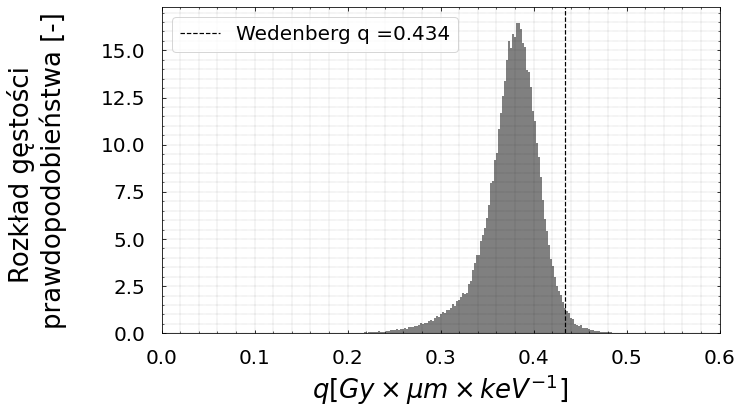

In [39]:
distrib_q(df)

mean:  0.37247043395543905 
std:  0.031721360253235596 
median:  0.3722703512584351 
quantile 2.5%:  0.3100908798525044 
quantile 97.5%:  0.43561259207504244


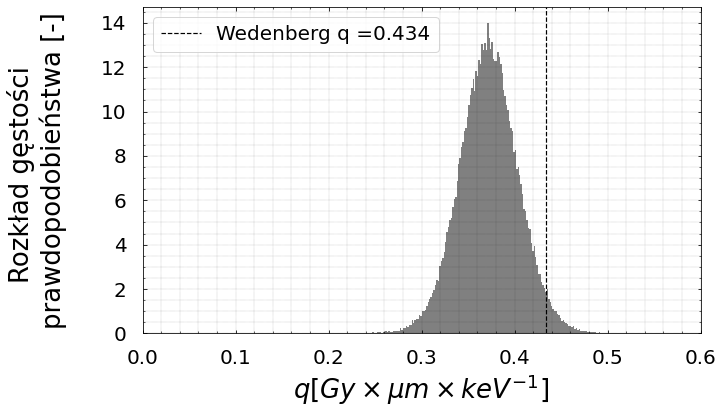

In [40]:
distrib_q(df3)

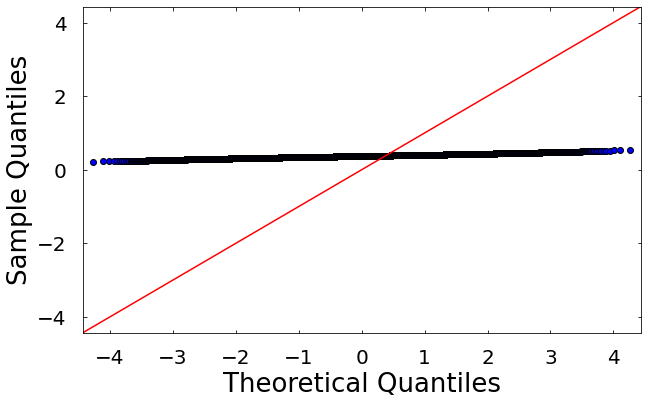

In [42]:
sm.qqplot(df3.q.values, line='45',color='k')
pylab.show()

In [43]:
res = mannwhitneyu(df.q.values,df2.q.values)
print(res)

MannwhitneyuResult(statistic=4019699512.0, pvalue=0.0)


In [44]:
res = ttest_ind(df.q.values,df2.q.values,equal_var=False)
print(res)

Ttest_indResult(statistic=-91.64302073497572, pvalue=0.0)


In [45]:
print(np.median(df.q.values),np.median(df2.q.values),np.std(df.q.values),np.std(df2.q.values))

0.37955362676268595 0.38650648042269375 0.031717545081280385 0.020748534511401982


In [46]:
wyniki = []
ids = []
values = []
i=0

for data in [df,df2,df3,df4,df5,df6]:
    i=i+1
    wyniki.append(data.q.values)

    ids += list(np.ones(data.q.values.shape[0],dtype=np.uint8)*i)
    values += list(data.q.values)
    
for w in wyniki:
    print(np.median(w),np.std(w))


0.37955362676268595 0.031717545081280385
0.38650648042269375 0.020748534511401982
0.3722703512584351 0.03172120164603781
0.3900592459601887 0.019152646106480115
0.37245113190479484 0.03180413104739111
0.38365658930080193 0.032417185276020846


# ANOVA post-hoc

https://scikit-posthocs.readthedocs.io/en/latest/tutorial/

If normality and other assumptions are violated, one can use a non-parametric Kruskal-Wallis H test (one-way non-parametric ANOVA) to test if samples came from the same distribution.

In [47]:
H,p = kruskal(*wyniki)
print(H,p)

36444.44135254272 0.0


Hipoteza 0 odrzucona, więc robimy Conovera post-hoc

P value tells us we may reject the null hypothesis that the population medians of all of the groups are equal. To learn what groups (species) differ in their medians we need to run post hoc tests.

Podobnie jak w przypadku analizy wariancji, istotny statystycznie wynik testu Kruskala-Wallisa mówi nam tylko o tym, że co najmniej jedna z grup różni się od innej grupy. 

To learn what groups (species) differ in their medians we need to run post hoc tests. scikit-posthocs provides a lot of non-parametric tests mentioned above. Let’s choose Conover’s test.

In [48]:
mydf = pd.DataFrame({'Val':values,'Id':ids})

sp.posthoc_conover(mydf, val_col='Val', group_col='Id', p_adjust = 'holm')

,1,2,3,4,5,6
1,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.351843e-257
2,0.000000e+00,1.000000e+00,0.000000,1.229986e-237,0.000000,0.000000e+00
3,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.458243,0.000000e+00
4,0.000000e+00,1.229986e-237,0.000000,1.000000e+00,0.000000,0.000000e+00
5,0.000000e+00,0.000000e+00,0.458243,0.000000e+00,1.000000,0.000000e+00
6,1.351843e-257,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00


Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of species and conclude that all groups (species) differ in their sepal widths.

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x250033cf220>)

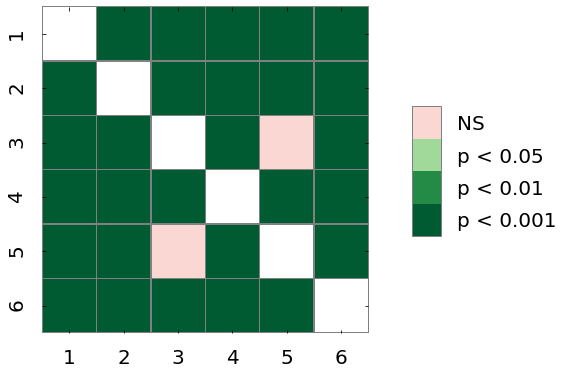

In [49]:
pc = sp.posthoc_conover(mydf, val_col='Val', group_col='Id')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

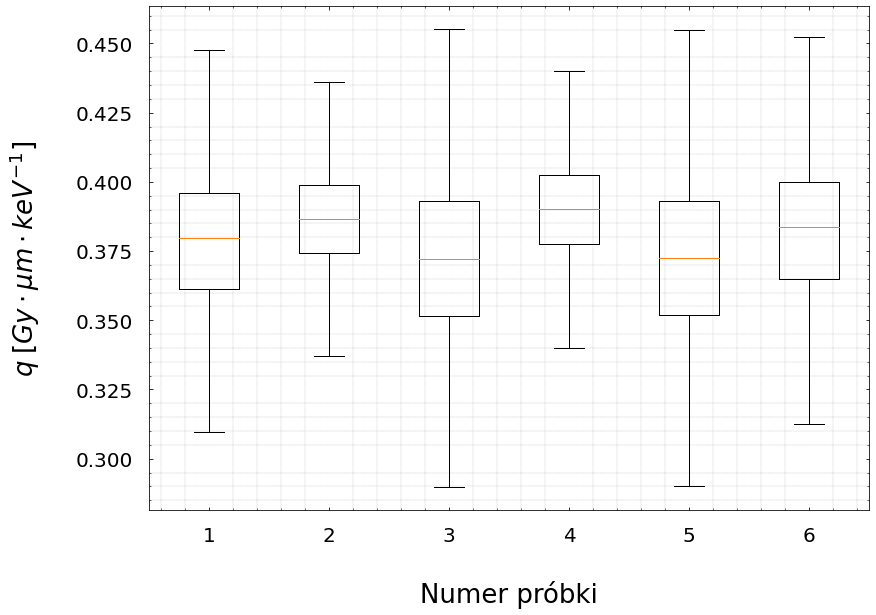

In [54]:
fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

data = [df.q.values,df2.q.values,df3.q.values,df4.q.values,df5.q.values,df6.q.values]

bp = ax.boxplot(data,showfliers=False)

ax.set_ylabel(r'$q\; [Gy\cdot \mu m \cdot keV^{-1}]$'+'\n')
ax.set_xlabel('\nNumer próbki')

plot_style()

tmp=pd.DataFrame(list(zip(data)),
                          columns=['q'])
tmp.to_csv("results/figure_5_8")

plt.savefig(fname="results/figure_5_8",dpi= 700)